# Importando bibliotecas necessárias

In [13]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Carregando os dados do MSNIT

In [14]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalizando os dados - Convertendo valores de pixel para float e normalizando (0 a 1)

In [15]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# Redimensionando os dados para o formato que o modelo espera (n_samples, img_row, img_cols, n_channels)

In [16]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# Convertendo rótulos para categorias one-shot

In [17]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Construindo o modelo de rede neural convolucional

In [18]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) #Achata a saída para formar um vetor
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax')) # Camada de saída com 10 neurônios para as 10 classes

# Compilando o modelo

In [19]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Treinando o modelo

In [23]:
history = model.fit(X_train, y_train, batch_size=128, epochs=6, validation_data=(X_test, y_test))

Epoch 1/6


469/469 [==============================] - 10s 20ms/step - loss: 0.2019 - accuracy: 0.9414 - val_loss: 0.0664 - val_accuracy: 0.9793
Epoch 2/6
469/469 [==============================] - 9s 19ms/step - loss: 0.0569 - accuracy: 0.9826 - val_loss: 0.0457 - val_accuracy: 0.9850
Epoch 3/6
469/469 [==============================] - 9s 19ms/step - loss: 0.0389 - accuracy: 0.9880 - val_loss: 0.0310 - val_accuracy: 0.9899
Epoch 4/6
469/469 [==============================] - 9s 19ms/step - loss: 0.0300 - accuracy: 0.9905 - val_loss: 0.0279 - val_accuracy: 0.9909
Epoch 5/6
469/469 [==============================] - 9s 19ms/step - loss: 0.0229 - accuracy: 0.9929 - val_loss: 0.0325 - val_accuracy: 0.9897
Epoch 6/6
469/469 [==============================] - 9s 19ms/step - loss: 0.0203 - accuracy: 0.9934 - val_loss: 0.0270 - val_accuracy: 0.9901


# Avaliando o modelo

In [24]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy:) {accuracy:.2f}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0270 - accuracy: 0.9901
Test accuracy:) 0.99


# Plotando gráficos de acurácia e perda

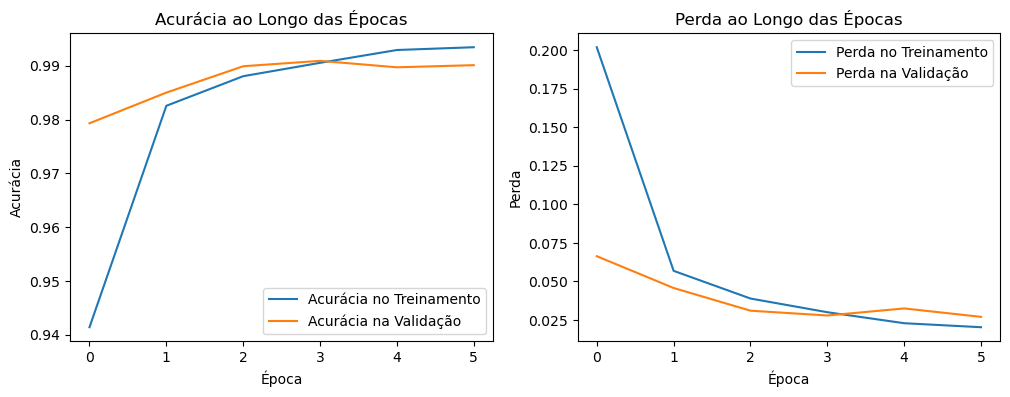

In [27]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Acurácia no Treinamento')
plt.plot(history.history['val_accuracy'], label='Acurácia na Validação')
plt.title('Acurácia ao Longo das Épocas')
plt.ylabel('Acurácia')
plt.xlabel('Época')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Perda no Treinamento')
plt.plot(history.history['val_loss'], label='Perda na Validação')
plt.title('Perda ao Longo das Épocas')
plt.ylabel('Perda')
plt.xlabel('Época')
plt.legend()

plt.show()